# DCGAN을 이용한 차량이미지 생성
### 차량 인식 인공지능을 위한 데이터 생성

###### 자율주행에 쓰이는 인공지능은 목적지까지 가는 길을 찾는 일뿐만 아니라 차량 전방의 장애물과 교통신호, 앞뒤 양옆의 차량을 인식하고 도로의 차선을 모두 인식해야 탑승자의 안전을 보장할 수 있습니다.
###### 이렇게 많은 것을 인식할 수 있는 인공지능의 일부분인 차량인식 인공지능에 데이터가 추가되면 인공지능의 차량의 일반화가 더 좋아져 정확도가 높아질 수도 있겠죠
###### 이번 프로젝트의 주 목적은 DCGAN을 이용해 존재하지 않는 차량의 이미지를 생성하여 후에 자율주행 인공지능이 학습할 수 있는 차량 이미지 데이터로 활용하는 것 입니다. 이에 따라 제가 세운 가설은 DCGAN으로 차량인식 인공지능의 데이터에 쓸 수 있는 이미지를 생성할 수 있을 것이다 입니다.


**Deep Convolutional GAN**
###### GAN, Generative Adversarial Network, 생성적 적대 신경망은 새로운 데이터를 생성하기 위해 생성자, 판별자 이 두 신경망이 서로 겨루며 훈련합니다. 제 주제의 예를 들어 설명하면, 판별자는 입력된 이미지가 자동차의 이미지인지 아닌지를 판별하는 신경망이고, 생성자는 무작위 노이즈로 부터 한 이미지를 생성하고 판별자가 자신이 생성한 이미지를 차량으로 인식할 수 있도록 가중치를 업데이트하며 이미지를 수정해 나갑니다.





# 모델의 구조
###### 모델의 구조는 기존 DCGAN과 전체적인 구조와 같습니다. 다만 이번 프로젝트에서 베이스모델로 선정한 모델은 길이가 100인 노이즈에서 바로 들어가게 되는 첫번째 CNN layer가 64개의 필터를 가진 레이어 입니다. 두번째, 세번째, 네번째는 32, 16, 8 이렇게 필터의 개수가 줄어들게 됩니다

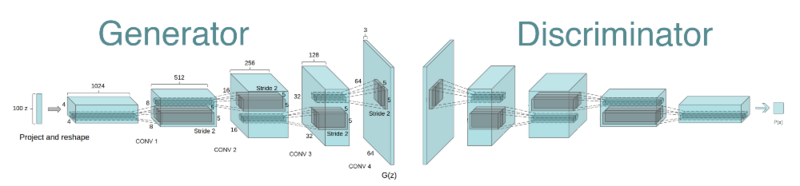

# 모델 활용의 타당성
###### 아래 사진들은 DCGAN이 해외 셀럽들의 이미지들을 이용해 생성해낸 사람의 얼굴입니다. 어떤 사진들은 합성한것 같지만 어떤사람은 자연스럽기도 합니다. 이번 프로젝트에서도 차량의 다양한 이미지를 생성할 것이라고 기대해보겠습니다.

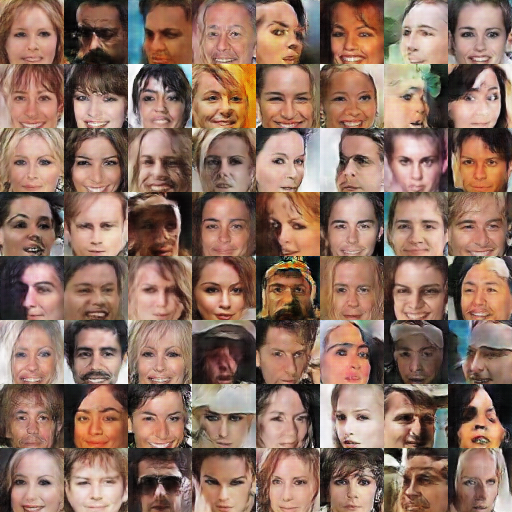

이미지 출처 : https://awesomeopensource.com/project/carpedm20/DCGAN-tensorflow

# 데이터 전처리


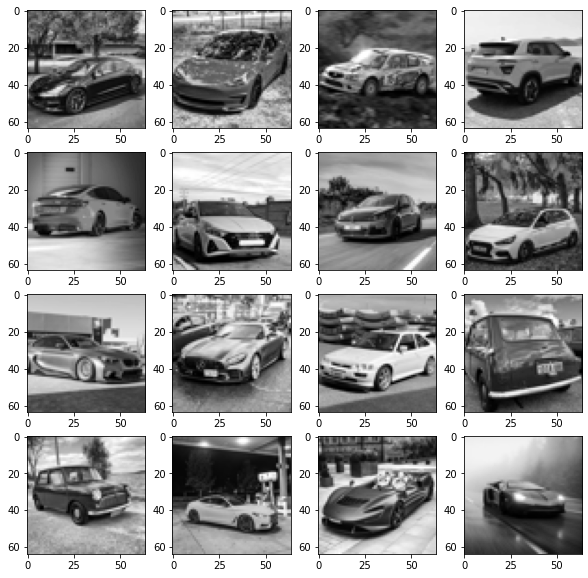

(16, 64, 64, 1)


In [10]:
import os
import numpy as np
from PIL import Image, ImageOps
import matplotlib.image as img
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import img_to_array


# 코랩 마운트 기능으로 구글 드라이브와 연결 후 드라이브 내 이미지를 불러옵니다
path = '/content/drive/MyDrive/Colab Notebooks/Project_section4/cars/'
dir_list = os.listdir('/content/drive/MyDrive/Colab Notebooks/Project_section4/cars/')

imgs = []
for item in dir_list:
  img = Image.open(path + item).resize((64,64))
  img = ImageOps.grayscale(img)
  imgs.append(img_to_array(img))
imgs = np.array(imgs)/255 -1

fig = plt.figure(figsize=(10, 10))
columns = 4
rows = 4
for i in range(1,17):
    fig.add_subplot(rows, columns, i)
    plt.imshow(imgs[i-1,:,:,0], cmap='gray')
plt.show()
print(imgs.shape)

# 결과 이미지

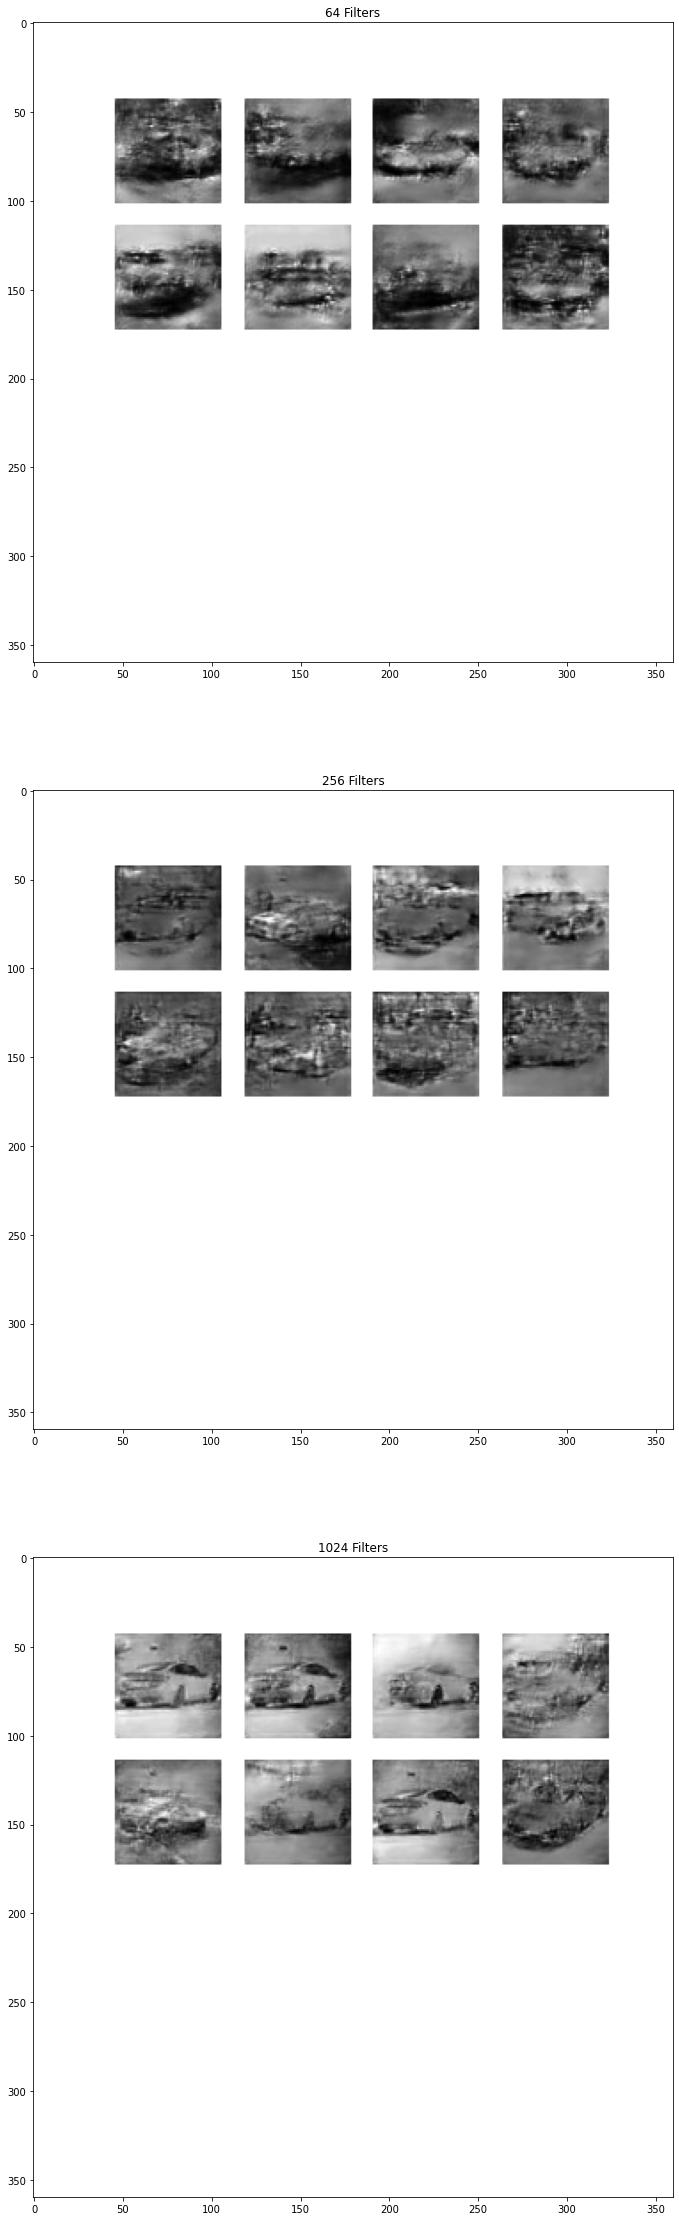

In [22]:
resultpath = '/content/drive/MyDrive/Colab Notebooks/Project_section4/'
resultdir = ['results', 'results256', 'results1024']
imgname = '/image_at_epoch_3000.png'
filters = [64, 256, 1024]

resultimgs= []
for i in range(3):
  img = Image.open(resultpath + resultdir[i] + imgname)
  img = ImageOps.grayscale(img)
  resultimgs.append(img_to_array(img))
resultimgs = np.array(resultimgs)

fig = plt.figure(figsize=(20, 40))

for i in range(3):
    fig.add_subplot(3, 1, i+1)
    plt.imshow(resultimgs[i,:,:,0], cmap='gray')
    plt.title(f'{filters[i]} Filters')
plt.show()



# 한계점과 아쉬운점

* 학습에 너무 오랜시간이 걸린다
* 생성된 이미지가 입력된 이미지의 복제와 다를게 없어보였다.
* 자동차라는 것 자체가 대부분 비슷한 형상을 갖고 있기에 데이터 증강을 사용하여 데이터를 늘리는 것이 더 빠르고 경제적일 것이다
* 가져온 자동차의 이미지를 같은 구도의 이미지를 가져왔다면 학습의 속도도 빨라지고 학습이 더 잘돼 좀 더 알아보기 쉽고 다른 이미지들을 생성하지 않을까 하는 새로운 가설
* 학습에 흑백이미지만 사용하여 색상이미지를 사용하지 않은 점 
